In [14]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [15]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

In [16]:
df.head(10)

,Feature 1,Feature 2
0,2.698582,-0.672960
1,-0.128113,4.355952
2,2.509049,5.773146
3,-1.518276,3.444886
4,-0.072283,2.883769
5,9.158480,-2.022418
6,0.281702,4.154153
7,8.867313,-1.606801
8,1.690574,1.054368
9,1.575612,1.518022


In [17]:
df.describe()

,Feature 1,Feature 2
count,500.000000,500.000000
mean,1.831353,2.694970
std,4.086149,3.494165
min,-3.896491,-4.378493
25%,-1.174033,0.200712
50%,0.604212,2.807746
75%,2.750212,5.132506
max,11.867680,10.216205


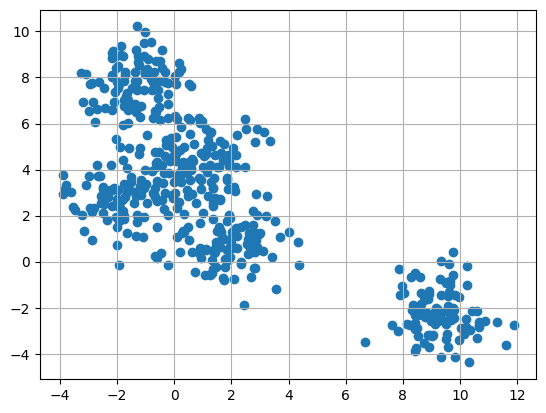

In [12]:
plt.scatter(X, Y)
plt.grid(True)

In [18]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [39]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    return math.sqrt(((P1.x-P2.x)**2+(P1.y-P2.y)**2))

def Mean(AP):
    ### Write code to find centroid of an group of points
    cx = sum(point.x for point in AP) / len(AP) if len(AP) != 0 else 0
    cy = sum(point.y for point in AP) / len(AP) if len(AP) != 0 else 0
    centroid = Point(cx, cy)
    return centroid

In [33]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    Dmin = Distance(P, AP[0])
    minIx = 0
    for i in range(1, len(AP)):
        if Distance(P, AP[i]) < Dmin:
            Dmin = Distance(P, AP[i])
            minIx = i

    return AP[minIx]

In [34]:
def equality(A1, A2):
    ### Check if A1 and A2 arrays are same or not(same values)
    if(len(A1)!=len(A2)):
      return False
    else:
      m=0
      for i in range(0,len(A1)-1):
        if(A1[i]==A2[i]):
          m=m+1
      if(m==len(A1)):
        return True

In [22]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    points = [Point(x, y) for x, y in zip(X, Y)]
    kMi = random.sample(points, k)
    kM = kMi
    D = {centroid: [] for centroid in kM}

    for _ in range(100):  # maximum number of iterations
        D = {centroid: [] for centroid in kM}
        for point in points:
            closest_centroid = MinPoint(point,kM)
            D[closest_centroid].append(point)

        new_centroids = [Mean(cluster) for cluster in D.values()]
        if equality(new_centroids, kM):
            break
        kM = new_centroids

    return [kM, kMi, D]

In [35]:
def Elbow(X, Y):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    distortions = []
    K = range(1, 11)
    for k in K:
        kM, kMi, D = kMeans(X, Y, k)
        distortion = sum(Distance(point, MinPoint(point, kM)) ** 2 for cluster in D.values() for point in cluster)
        distortions.append(distortion / k)
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()


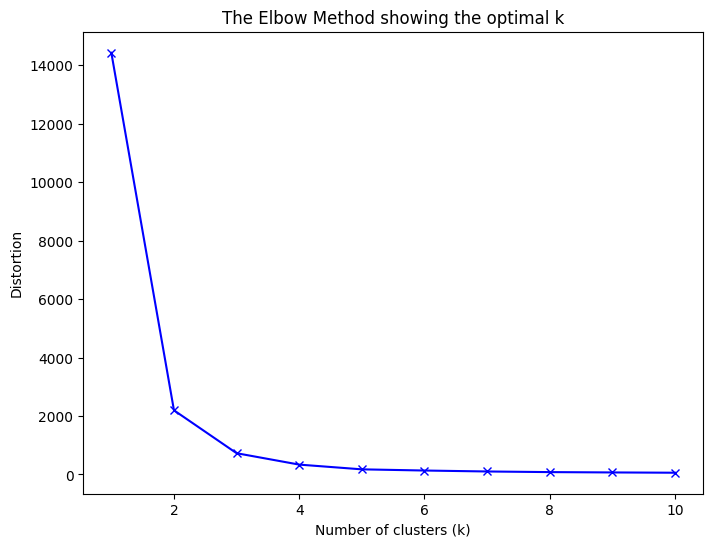

In [40]:
### Here, plot the elbow curve
Elbow(X,Y)
#from curve: the number of clusters required will be 2,3 or 4, k=3 fr fr

<ipython-input-63-5935cafbac0b>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid.x, centroid.y, color=final_centroid_color, marker='x', s=200, edgecolor='k', label=f'Final Centroid {i+1}')


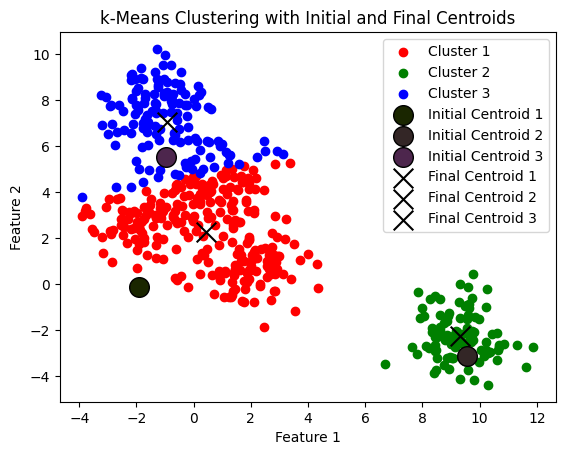

In [63]:
k=3
kM, kMi, D = kMeans(X, Y, k)

# Plotting the results
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Scatter plot of points color-coded by their cluster
for i, (centroid, points) in enumerate(D.items()):
    plt.scatter([p.x for p in points], [p.y for p in points], color=colors[i % len(colors)], label=f'Cluster {i+1}')

# Plot initial centroids with a distinct color
for i, centroid in enumerate(kMi):
    initial_centroid_color = (0.1+0.1*i,0.15,0.15*i,1)
    plt.scatter(centroid.x, centroid.y, color=initial_centroid_color, marker='o', s=200, edgecolor='k', label=f'Initial Centroid {i+1}')

# Plot final centroids with a distinct color
final_centroid_color = 'black'
for i, centroid in enumerate(kM):
    plt.scatter(centroid.x, centroid.y, color=final_centroid_color, marker='x', s=200, edgecolor='k', label=f'Final Centroid {i+1}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-Means Clustering with Initial and Final Centroids")
plt.legend()
plt.show()
#Initial centroid 1 is for cluster 1 as usual for all
# color is different for each initial centroid as per cluster type